In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import datetime as dt

import plotly.offline as pyoff
import plotly.graph_objs as go
import plotly.express as px

In [2]:
# read the data files
customers=pd.read_csv("Customers.csv")
orders=pd.read_csv("ORDERS.csv")
order_items=pd.read_csv("ORDER_ITEMS.csv")
order_payments=pd.read_csv("ORDER_PAYMENTS.csv")
order_reviews=pd.read_csv("ORDER_REVIEW_RATINGS.csv")
products=pd.read_csv("PRODUCTS.csv")
sellers=pd.read_csv("SELLERS.csv")
geo_locations=pd.read_csv("GEO_LOCATION.csv")

In [3]:
customers.head(3)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,Adilabad,Andhra Pradesh
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,Adoni,Andhra Pradesh
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,Akkarampalle,Andhra Pradesh


In [4]:
customers.info()
# no missing values are there and data type is also appropriate 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [5]:
orders.head(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,10/2/2017 10:56,10/2/2017 11:07,10/4/2017 19:55,10/10/2017 21:25,10/18/2017 0:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,7/24/2018 20:41,7/26/2018 3:24,7/26/2018 14:31,8/7/2018 15:27,8/13/2018 0:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,8/8/2018 8:38,8/8/2018 8:55,8/8/2018 13:50,8/17/2018 18:06,9/4/2018 0:00


In [6]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [7]:
orders.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [8]:
# change the data type to date columns for orders table
orders['order_purchase_timestamp']=pd.to_datetime(orders.order_purchase_timestamp)
orders['order_approved_at']=pd.to_datetime(orders.order_approved_at)
orders['order_delivered_carrier_date']=pd.to_datetime(orders.order_delivered_carrier_date)
orders['order_delivered_customer_date']=pd.to_datetime(orders.order_delivered_customer_date)
orders['order_estimated_delivery_date']=pd.to_datetime(orders.order_estimated_delivery_date)

# change the data type to date column for order_reviews table

order_reviews['review_creation_date']=pd.to_datetime(order_reviews.review_creation_date)
order_reviews['review_answer_timestamp']=pd.to_datetime(order_reviews.review_answer_timestamp)

# change the data type to date column for order_items table
order_items['shipping_limit_date']=pd.to_datetime(order_items.shipping_limit_date)


In [9]:
#                                            create all the Joins 
# Number of rows in each data set
# customers.info() --99441
# order_payments.info()--103886
# orders.info()--99441
# order_reviews.info()-100000
# order_items.info() -112650
# products.info() --32951
# sellers.info()--3095
# geo_locations --19015

# Join the customer and order data 
cust_order=pd.merge(left=customers,right=orders,left_on='customer_id',right_on='customer_id',how='left')

# Join the orders and order_payments data 
orders_join_payments=pd.merge(left=orders,right=order_payments,left_on='order_id',right_on='order_id',how='right')

# Join the orders and order_payments data 
orders_join_reviews=pd.merge(left=orders,right=order_reviews,left_on='order_id',right_on='order_id',how='right')

# Join the order_items and order_items data 
orders_join_items=pd.merge(left=orders,right=order_items,left_on='order_id',right_on='order_id',how='right')

# Join the orders and products data 
orders_items_join_products=pd.merge(left=order_items,right=products,left_on='product_id',right_on='product_id',how='left')

# Join the sellers and order_items data 
sellers_join_order_items=pd.merge(left=order_items,right=sellers,left_on='seller_id',right_on='seller_id',how='left')

# Join the sellers and geo_locations data 
sellers_join_geo=pd.merge(left=sellers,right=geo_locations,left_on='seller_zip_code_prefix',right_on='geolocation_zip_code_prefix',how='left')

# Join the sellers and geo_locations data 
customers_join_geo=pd.merge(left=customers,right=geo_locations,left_on='customer_zip_code_prefix',right_on='geolocation_zip_code_prefix',how='left')



### 1  a. Define & calculate high level metrics like (Total Revenue, Total quantity, Total products, Total categories, 
### Total sellers, Total locations, Total channels, Total payment methods etc…)


In [10]:
print('Total Revenue -' ,orders_join_payments.payment_value.sum())
print('Total Quantity -',orders_join_items['order_id'].count())
print('Total products -',orders_items_join_products.product_id.count())
print('Total categories -', len(orders_items_join_products.product_category_name.unique()))
print('Total sellers -' , len(sellers_join_order_items.seller_id.unique()))
print ('Total Sellers locations -' , len(sellers_join_geo.geolocation_city.unique()))
print ('Total Customer locations -' , len(cust_order.customer_city.unique()))
print ('Total channels -' , len(orders_join_payments.payment_type.unique()))
print ('Total payment methods -' , len(orders_join_payments.payment_type.unique()))

Total Revenue - 16008872.12
Total Quantity - 112650
Total products - 112650
Total categories - 72
Total sellers - 3095
Total Sellers locations - 530
Total Customer locations - 4119
Total channels - 5
Total payment methods - 5


### 1  b. Understanding how many new customers acquired every month

In [11]:
# adding Month column yearwise
cust_order['month_of_year']=cust_order['order_purchase_timestamp'].apply(lambda x : pd.Timestamp.strftime(x,format='%Y%m'))

In [12]:
new_cust_month_wise=cust_order.drop_duplicates(subset = ['customer_unique_id'], keep = 'first').groupby(by='month_of_year')['customer_unique_id'].nunique().reset_index()
new_cust_month_wise



,month_of_year,customer_unique_id
0,201609,4
1,201610,315
2,201701,749
3,201702,1727
4,201703,2595
5,201704,2318
6,201705,3533
7,201706,3103
8,201707,3864
9,201708,4144


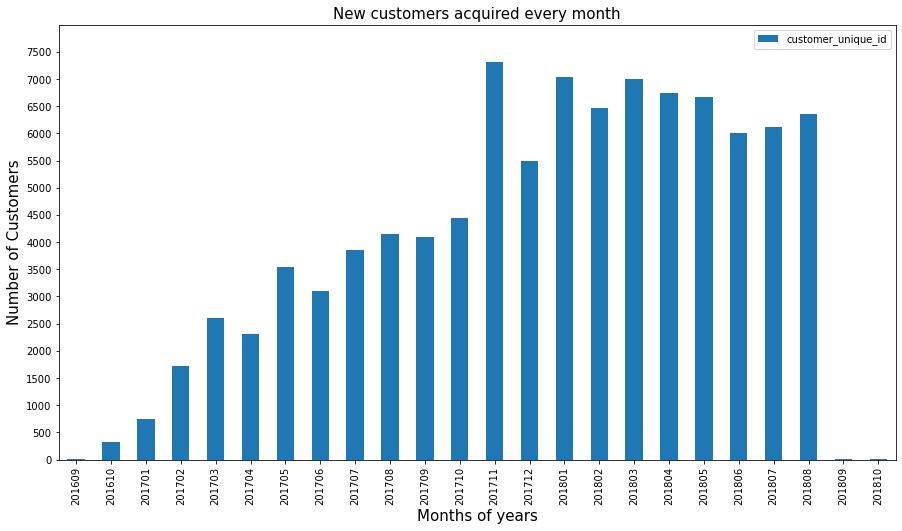

In [13]:
new_cust_month_wise_plot = pd.pivot_table(data = new_cust_month_wise,index=["month_of_year"],values="customer_unique_id")

# graphical representation
new_cust_month_wise_plot.plot(kind="bar",figsize=(15,8),width=.5)
plt.ylim(0, 8000)
plt.yticks(np.arange(0, 8000, step=500)) 
plt.ylabel("Number of Customers",fontsize=15)
plt.xlabel("Months of years",fontsize=15)
plt.title("New customers acquired every month",fontsize=15)
plt.show()



### 1  c. Understand the retention of customers on month on month basis

In [14]:
cust_order

user_purchase=cust_order.groupby(['customer_unique_id','month_of_year'])['order_id'].count().reset_index()
retention=pd.crosstab(user_purchase['customer_unique_id'], user_purchase['month_of_year']).reset_index()


In [15]:
#create an array of dictionary which keeps Retained & Total User count for each month
months=retention.columns[2:]
retention_array = []
for i in range(len(months)-1):
        retention_data = {}
        selected_month = months[i+1]
        prev_month = months[i]
        retention_data['month_of_year'] = int(selected_month)
        retention_data['TotalUserCount'] = retention[selected_month].sum()
        retention_data['RetainedUserCount'] = retention[(retention[selected_month]>0) & (retention[prev_month]>0)][selected_month].sum()
        retention_array.append(retention_data)

#convert the array to dataframe and calculate Retention Rate
retention = pd.DataFrame(retention_array)
retention['RetentionRate'] = retention['RetainedUserCount']/retention['TotalUserCount']

In [121]:
retention_plot=pd.pivot_table(data=retention,index=['month_of_year'],values=['RetentionRate']).reset_index()
retention_plot
retention_plot['month_of_year']=retention_plot['month_of_year'].astype('object')


# retention_plot.plot(kind='line',figsize=(15,5))
# # plt.ylim(.001, .7)
# # plt.yticks(np.arange(.001, .7, step=.02)) 
# # plt.xticks(('201612','201701','201702','201703','201704','201705','201706','201707','201708','201709','201710','201711','201712','201801','201802','201803','201804','201805','201806','201807','201808','201809','201810')) 
# plt.ylabel("Retention Rate %",fontsize=15)
# plt.xlabel("Months of years",fontsize=15)
# plt.title("Retention Rate every month",fontsize=15)
# plt.show()

plot_data = [
    go.Scatter(
        x=retention_plot.month_of_year,
        y=retention_plot.RetentionRate,
       
    )]

plot_layout = go.Layout(
        xaxis={"type": "category"},
        title='retention of customers on month on month basis'
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
# pyoff.iplot(fig)
fig.show("notebook_connected")

In [17]:
retention

,month_of_year,TotalUserCount,RetainedUserCount,RetentionRate
0,201612,1,0,0.000000
1,201701,765,1,0.001307
2,201702,1755,3,0.001709
3,201703,2642,4,0.001514
4,201704,2372,13,0.005481
5,201705,3625,14,0.003862
6,201706,3180,18,0.005660
7,201707,3947,17,0.004307
8,201708,4246,23,0.005417
9,201709,4212,33,0.007835


### 1  d. How the revenues from existing/new customers on month on month basis

In [18]:
cust_orders_join_payments=pd.merge(left=customers,right=orders_join_payments,left_on='customer_id',right_on='customer_id',how='right')
cust_orders_join_payments
# adding year month to orders_join_payments

cust_orders_join_payments['yearmonth']=cust_orders_join_payments['order_purchase_timestamp'].apply(lambda x : pd.Timestamp.strftime (x,'%Y%m'))

In [19]:
user_payments=cust_orders_join_payments.groupby(['customer_unique_id','yearmonth'])['payment_value'].sum().reset_index()
new_existing_payments=pd.crosstab(user_payments['customer_unique_id'], user_payments['yearmonth']).reset_index()

cust_orders_join_payments['yearmonth']=cust_orders_join_payments['yearmonth'].astype('int64')

In [20]:
#create a dataframe contaning CustomerID and first purchase date
min_purchase = cust_orders_join_payments.groupby('customer_unique_id').order_purchase_timestamp.min().reset_index()
min_purchase.columns = ['customer_unique_id','MinPurchaseDate']
min_purchase['MinPurchaseYearMonth'] = min_purchase['MinPurchaseDate'].map(lambda date: 100*date.year + date.month)
min_purchase

#merge first purchase date column to our main dataframe 
cust_orders_join_payments = pd.merge(cust_orders_join_payments, min_purchase, on='customer_unique_id')
cust_orders_join_payments

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value,yearmonth,MinPurchaseDate,MinPurchaseYearMonth
0,0a8556ac6be836b46b3e89920d59291c,708ab75d2a007f0564aedd11139c7708,39801,Nuh,Haryana,b81ef226f3fe1789b1e8b2acac839d17,delivered,2018-04-25 22:01:00,2018-04-25 22:15:00,2018-05-02 15:20:00,2018-05-09 17:36:00,2018-05-22,1,credit_card,8,99.33,201804,2018-04-25 22:01:00,201804
1,f2c7fc58a9de810828715166c672f10a,a8b9d3a27068454b1c98cc67d4e31e6f,2422,Akkarampalle,Andhra Pradesh,a9810da82917af2d9aefd1278f1dcfa0,delivered,2018-06-26 11:01:00,2018-06-26 11:18:00,2018-06-28 14:18:00,2018-06-29 20:32:00,2018-07-16,1,credit_card,1,24.39,201806,2018-06-26 11:01:00,201806
2,25b14b69de0b6e184ae6fe2755e478f9,6f70c0b2f7552832ba46eb57b1c5651e,2652,Akkarampalle,Andhra Pradesh,25e8ea4e93396b6fa0d3dd708e76c1bd,delivered,2017-12-12 11:19:00,2017-12-14 09:52:00,2017-12-15 20:13:00,2017-12-18 17:24:00,2018-01-04,1,credit_card,1,65.71,201712,2017-12-12 11:19:00,201712
3,7a5d8efaaa1081f800628c30d2b0728f,87695ed086ebd36f20404c82d20fca87,36060,Itanagar,Arunachal Pradesh,ba78997921bbcdc1373bb41e913ab953,delivered,2017-12-06 12:04:00,2017-12-06 12:13:00,2017-12-07 20:28:00,2017-12-21 01:35:00,2018-01-04,1,credit_card,8,107.78,201712,2017-12-06 12:04:00,201712
4,15fd6fb8f8312dbb4674e4518d6fa3b3,4291db0da71914754618cd789aebcd56,18570,Taloje Panchnad,Maharashtra,42fdf880ba16b47b59251dd489d4441a,delivered,2018-05-21 13:59:00,2018-05-21 16:14:00,2018-05-22 11:46:00,2018-06-01 21:44:00,2018-06-13,1,credit_card,2,128.45,201805,2018-05-21 13:59:00,201805
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103881,d8f3aacf5cf5ddf9ceef4ad39e874c98,0858c8086ef3b4bc86fef82638bcfa52,79118,Jafrabad,Gujarat,7159096c5aa9be77f7f0c26c01ee9793,canceled,2018-03-15 10:06:00,2018-03-15 10:29:00,NaT,NaT,2018-04-06,1,credit_card,4,280.65,201803,2018-03-15 10:06:00,201803
103882,5d576cb2dfa3bc05612c392a1ee9c654,b6027ac07fb76ebca8c97b1887865aee,12954,Patancheru,Andhra Pradesh,0406037ad97740d563a178ecc7a2075c,delivered,2018-03-08 16:57:00,2018-03-10 03:55:00,2018-03-12 18:19:00,2018-03-16 13:09:00,2018-04-04,1,UPI,1,363.31,201803,2018-03-08 16:57:00,201803
103883,e4abb5057ec8cfda9759c0dc415a8188,d3c7da954a324253814096bcaf240e4e,1519,Akkarampalle,Andhra Pradesh,32609bbb3dd69b3c066a6860554a77bf,invoiced,2017-11-18 17:27:00,2017-11-18 17:46:00,NaT,NaT,2017-12-05,1,credit_card,1,47.77,201711,2017-11-18 17:27:00,201711
103884,5d719b0d300663188169c6560e243f27,b84dc68f02f122a88d7e7bbd37b06204,22733,Badepalle,Andhra Pradesh,b8b61059626efa996a60be9bb9320e10,delivered,2018-08-07 23:26:00,2018-08-07 23:45:00,2018-08-09 11:46:00,2018-08-21 22:41:00,2018-08-24,1,credit_card,5,369.54,201808,2018-08-07 23:26:00,201808


In [21]:
cust_orders_join_payments['UserType'] = 'New'
cust_orders_join_payments.loc[cust_orders_join_payments['yearmonth']>cust_orders_join_payments['MinPurchaseYearMonth'],'UserType']= 'Existing'

In [22]:
revenue_old_new_cust=cust_orders_join_payments.groupby(['yearmonth','UserType'])['payment_value'].sum().reset_index().sort_values(by='yearmonth')

In [23]:
df_revenue_old_new_cust = revenue_old_new_cust.pivot(index='yearmonth', columns='UserType', values='payment_value')
df1_revenue_old_new_cust=df_revenue_old_new_cust.reset_index()


In [24]:
# df1_revenue_old_new_cust.plot('yearmonth',figsize=(15,5))
# plt.ylabel("Revenue New vs old ",fontsize=15)
# plt.xlabel("Months of years",fontsize=15)
# plt.title("Revenue  New vs old ",fontsize=15)
# plt.show()

In [25]:
revenue_old_new_cust['yearmonth']=revenue_old_new_cust['yearmonth'].astype('object')
revenue_old_new_cust

,yearmonth,UserType,payment_value
0,201609,New,252.24
1,201610,New,59090.48
2,201612,New,19.62
3,201701,Existing,19.62
4,201701,New,138468.42
5,201702,Existing,170.83
6,201702,New,291737.18
7,201703,Existing,650.82
8,201703,New,449212.78
9,201704,Existing,2566.60


In [122]:


plot_data = [
    go.Scatter(
        x=revenue_old_new_cust.query("UserType == 'New'")['yearmonth'],
        y=revenue_old_new_cust.query("UserType == 'New'")['payment_value'],
        name = 'Existing'
    ),
    go.Scatter(
        x=revenue_old_new_cust.query("UserType == 'Existing'")['yearmonth'],
        y=revenue_old_new_cust.query("UserType == 'Existing'")['payment_value'],
        name = 'New'
    )
]

plot_layout = go.Layout(
        xaxis={"type": "category"},
        title='Revenue  New vs old customers'
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
# pyoff.iplot(fig)
fig.show("notebook_connected")

###  1 e. Understand the trends/seasonality of sales, quantity by category, location, month,week, day, time, channel, payment method etc…


In [27]:
orders_join_payments

orders_join_payments['yearmonth']= orders_join_payments['order_purchase_timestamp'].apply(lambda x : pd.Timestamp.strftime (x,'%Y%m'))

In [28]:
sale_by_month=orders_join_payments.groupby(by='yearmonth')[['payment_value']].sum().reset_index()

plot_data = [
    go.Scatter(
        x=sale_by_month.yearmonth,
        y=sale_by_month.payment_value,
       
    )]

plot_layout = go.Layout(
        xaxis={"type": "category"},
        title='Total Sales By Months & Year'
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

In [123]:
quantity_by_cat=orders_items_join_products.groupby(by='product_category_name')[['order_id']].count().reset_index()
quantity_by_cat


fig=px.bar(quantity_by_cat,x='order_id', y='product_category_name', title='Total Sales Quantity by Category',width=1000,height=1500,orientation='h')
fig.update_layout(xaxis_title='No. of Quantity',yaxis_title='product_category_name')
# fig.show()
fig.show("notebook_connected")

In [124]:
sale_by_loc=cust_order.groupby(by='customer_state')[['order_id']].count().reset_index()
sale_by_loc


fig=px.bar(sale_by_loc,x='customer_state', y='order_id', title='Total Sale Quantity by Location',width=1000,height=600)
fig.update_layout(xaxis_title='Location',yaxis_title='Total Sales Quantity')
# fig.show()
fig.show("notebook_connected")

In [31]:
orders_join_payments['Year_week']=orders_join_payments['order_purchase_timestamp'].apply(lambda x : pd.Timestamp.strftime (x,'%Y%V'))

In [125]:
sale_by_week=orders_join_payments.groupby(by='Year_week')[['payment_value']].sum().reset_index()
sale_by_week

plot_data = [
    go.Scatter(
        x=sale_by_week.Year_week,
        y=sale_by_week.payment_value,
       
    )]

plot_layout = go.Layout(
        xaxis={"type": "category"},
        title='Total Sales By weekly',autosize=False,
    width=1000,
    height=500,
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
# pyoff.iplot(fig)
fig.show("notebook_connected")

In [33]:
orders_join_payments['day_year']=orders_join_payments['order_purchase_timestamp'].apply(lambda x : pd.Timestamp.strftime (x,'%Y-%d'))

In [126]:
sale_by_day=orders_join_payments.groupby(by='day_year')[['payment_value']].sum().reset_index()
sale_by_day

plot_data = [
    go.Scatter(
        x=sale_by_day.day_year,
        y=sale_by_day.payment_value,
       
    )]

plot_layout = go.Layout(
        xaxis={"type": "category"},
        title='Total Sales By Day',autosize=True,
    width=5000,
    height=500,
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
# pyoff.iplot(fig)
fig.show("notebook_connected")

In [129]:


sale_by_channel=orders_join_payments.groupby(by='payment_type')[['payment_value']].sum().reset_index()
sale_by_channel

plot_data = [
    go.Scatter(
        x=sale_by_channel.payment_type,
        y=sale_by_channel.payment_value,
       
    )]

plot_layout = go.Layout(
        xaxis={"type": "category"},
        title='Total Sales By Channel and Payment Method',autosize=False,
    width=1000,
    height=500,
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
# pyoff.iplot(fig)
fig.show("notebook_connected")

fig=px.pie(sale_by_channel,names='payment_type',values='payment_value',title='Total Sales By Channel and Payment Method')
# fig.show()
fig.show("notebook_connected")

### 1 f. Popular Products by month, seller, state, category.

In [36]:
orders_join_items_join_products=pd.merge(left=orders_join_items,right=products,left_on='product_id',right_on='product_id',how='right')

In [37]:
orders_join_items_join_products['yearmonth']=orders_join_items_join_products['order_purchase_timestamp'].apply(lambda x : pd.Timestamp.strftime(x,'%Y%m'))

In [38]:
popular_Prod_by_month=orders_join_items_join_products[['yearmonth','product_category_name','order_id']].groupby(['yearmonth','product_category_name']).aggregate('count').reset_index()
sort_popular_Prod_by_month=popular_Prod_by_month.sort_values(['yearmonth', 'order_id'], ascending=[True, False]).drop_duplicates(['yearmonth'])


In [39]:
sort_popular_Prod_by_month

,yearmonth,product_category_name,order_id
1,201609,Health_Beauty,3
21,201610,Furniture_Decor,67
34,201612,Fashion_Bags_Accessories,1
56,201701,Furniture_Decor,182
105,201702,Furniture_Decor,266
155,201703,Furniture_Decor,328
187,201704,Bed_Bath_Table,274
246,201705,Bed_Bath_Table,369
303,201706,Bed_Bath_Table,382
363,201707,Bed_Bath_Table,579


In [130]:

fig = px.bar(sort_popular_Prod_by_month, x="yearmonth", y="order_id", color="product_category_name", title="Most Popular Category by Month",width=1000,height=600,)
fig.update_layout(xaxis_title="Month and year", yaxis_title="Max Category Count Per month")
fig.update_yaxes(tick0=0, dtick=100)
# fig.show()
fig.show("notebook_connected")

In [41]:
populer_prod_by_seller=pd.merge(left=sellers_join_order_items,right=products,left_on='product_id',right_on='product_id',how='left')

populer_prod_by_seller_count=populer_prod_by_seller.groupby(by=['seller_city','product_category_name'])[['order_id']].aggregate('count').reset_index()

sort_populer_prod_by_seller_count=populer_prod_by_seller_count.sort_values(['seller_city', 'order_id'], ascending=[True, False]).drop_duplicates(['seller_city'])

In [42]:
sort_populer_prod_by_seller_count

,seller_city,product_category_name,order_id
0,Aadityana,Furniture_Decor,3
2,Aarambhada,Computers_Accessories,18
4,Achabal,Pet_Shop,1
5,Adalaj,Pet_Shop,16
14,Adilabad,Health_Beauty,228
...,...,...,...
2998,Yellandu,Construction_Tools_Lights,4
3000,Yemmiganur,Health_Beauty,18
3007,Zahirabad,Bed_Bath_Table,352
3017,Ziauddin Pur,Garden_Tools,212


In [131]:

fig = px.bar(sort_populer_prod_by_seller_count, x="order_id", y="seller_city", color="product_category_name", title="Most Popular Product by Seller",width=1000,height=1600,orientation='h')
fig.update_layout(xaxis_title="Max Product Count Per Seller", yaxis_title="seller")
fig.update_xaxes(tick0=0, dtick=300)
fig.update_layout(legend = dict(bgcolor = 'yellow'))
fig.update_layout({
'plot_bgcolor': 'rgba(0,0,0,0)',
'paper_bgcolor': 'rgba(0,0,0,0)',
})

# fig.show()
fig.show("notebook_connected")

In [44]:
populer_prod_by_state_count=populer_prod_by_seller.groupby(by=['seller_state','product_category_name'])[['order_id']].aggregate('count').reset_index()

sort_populer_prod_by_state_count=populer_prod_by_state_count.sort_values(['seller_state', 'order_id'], ascending=[True, False]).drop_duplicates(['seller_state'])

In [45]:
sort_populer_prod_by_state_count

,seller_state,product_category_name,order_id
42,Andhra Pradesh,Health_Beauty,7639
87,Arunachal Pradesh,Sports_Leisure,400
130,Chhattisgarh,Housewares,664
177,Delhi,Health_Beauty,279
202,Gujarat,Bed_Bath_Table,6312
261,Haryana,Computers_Accessories,534
311,Himachal Pradesh,Sports_Leisure,161
348,Jammu & Kashmir,Sports_Leisure,409
374,Karnataka,Furniture_Decor,505
410,Kerala,Housewares,73


In [132]:
fig = px.bar(sort_populer_prod_by_state_count, x="seller_state", y="order_id", color="product_category_name", title="Most Popular Product by state",width=1000,height=600)
fig.update_layout(xaxis_title="state", yaxis_title="Max Product Count Per State")
fig.update_yaxes(tick0=0, dtick=500)
fig.update_layout(legend = dict(bgcolor = 'yellow'))
# fig.show()
fig.show("notebook_connected")

In [47]:
popular_Prod_by_category=orders_join_items_join_products.groupby(by=['product_category_name'])[['order_id']].aggregate('count').reset_index().sort_values('order_id')


In [133]:
fig = px.bar(popular_Prod_by_category, x="order_id", y="product_category_name", title="Most Popular Product by Category",width=1000,height=1000,orientation='h')
fig.update_layout(xaxis_title="Max Product Count", yaxis_title="Products")
fig.update_xaxes(tick0=0, dtick=1000)
# fig.show()
fig.show("notebook_connected")

###  1  g. Popular categories by state, month

In [49]:
fig = px.bar(sort_populer_prod_by_state_count, x="seller_state", y="order_id", color="product_category_name", title="Most Popular categories by state",width=1000,height=600)
fig.update_layout(xaxis_title="state", yaxis_title="Max categories Count Per State")
fig.update_yaxes(tick0=0, dtick=500)
fig.update_layout(legend = dict(bgcolor = 'yellow'))
fig.show()

In [134]:
fig = px.bar(sort_popular_Prod_by_month, x="yearmonth", y="order_id", color="product_category_name", title="Most Popular Category by Month",width=1000,height=600,)
fig.update_layout(xaxis_title="Month and year", yaxis_title="Max Category Count Per month")
fig.update_yaxes(tick0=0, dtick=100)
# fig.show()
fig.show("notebook_connected")

###  1 h. List top 10 most expensive products sorted by price

In [51]:
orders_join_items_join_products.groupby(by ='product_category_name')[['price']]


In [52]:
most_exp_top_10_prod=orders_join_items_join_products.sort_values('price', ascending=False).drop_duplicates(['product_category_name'])[['product_category_name','price']].head(11)
most_exp_top_10_prod

,product_category_name,price
20528,Housewares,6735.00
73922,Computers,6729.00
49503,Art,6499.00
71835,Small_Appliances,4799.00
106405,Musical_Instruments,4399.87
104826,Consoles_Games,4099.99
46034,Sports_Leisure,4059.00
40027,Watches_Gifts,3999.90
110710,NaN,3980.00
83794,Garden_Tools,3930.00


In [135]:
most_exp_top_10_prod

fig = px.bar(most_exp_top_10_prod, x="product_category_name", y="price", title="Top 10 most expensive products sorted by price",width=1000,height=600,)
fig.update_layout(xaxis_title="product_category_name", yaxis_title="price")
fig.update_yaxes(tick0=0, dtick=1000)
# fig.show()
fig.show("notebook_connected")

### 2. Performing Customers/sellers Segmentation
### a. Divide the customers into groups based on the revenue generated

In [54]:
cust_orders_join_payments

total_revenue_per_cust=cust_orders_join_payments.groupby(by='customer_unique_id')[['payment_value']].sum().reset_index()

In [55]:
total_revenue_per_cust.rename(columns={"payment_value": "total_revenue_per_customer", },inplace=True)

In [56]:
total_revenue_per_cust

,customer_unique_id,total_revenue_per_customer
0,0000366f3b9a7992bf8c76cfdf3221e2,141.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,27.19
2,0000f46a3911fa3c0805444483337064,86.22
3,0000f6ccb0745a6a4b88665a16c9f078,43.62
4,0004aac84e0df4da2b147fca70cf8255,196.89
...,...,...
96090,fffcf5a5ff07b0908bd4e2dbc735a684,2067.42
96091,fffea47cd6d3cc0a88bd621562a9d061,84.58
96092,ffff371b4d645b6ecea244b27531430a,112.46
96093,ffff5962728ec6157033ef9805bacc48,133.69


In [57]:
# now merge the df total_revenue_per_cust and cust_orders_join_payments on customer_id

In [58]:
cust_orders_join_payments=pd.merge(left=cust_orders_join_payments,right=total_revenue_per_cust, left_on='customer_unique_id',right_on='customer_unique_id',how='left')

In [59]:
cust_orders_join_payments

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value,yearmonth,MinPurchaseDate,MinPurchaseYearMonth,UserType,total_revenue_per_customer
0,0a8556ac6be836b46b3e89920d59291c,708ab75d2a007f0564aedd11139c7708,39801,Nuh,Haryana,b81ef226f3fe1789b1e8b2acac839d17,delivered,2018-04-25 22:01:00,2018-04-25 22:15:00,2018-05-02 15:20:00,...,2018-05-22,1,credit_card,8,99.33,201804,2018-04-25 22:01:00,201804,New,99.33
1,f2c7fc58a9de810828715166c672f10a,a8b9d3a27068454b1c98cc67d4e31e6f,2422,Akkarampalle,Andhra Pradesh,a9810da82917af2d9aefd1278f1dcfa0,delivered,2018-06-26 11:01:00,2018-06-26 11:18:00,2018-06-28 14:18:00,...,2018-07-16,1,credit_card,1,24.39,201806,2018-06-26 11:01:00,201806,New,24.39
2,25b14b69de0b6e184ae6fe2755e478f9,6f70c0b2f7552832ba46eb57b1c5651e,2652,Akkarampalle,Andhra Pradesh,25e8ea4e93396b6fa0d3dd708e76c1bd,delivered,2017-12-12 11:19:00,2017-12-14 09:52:00,2017-12-15 20:13:00,...,2018-01-04,1,credit_card,1,65.71,201712,2017-12-12 11:19:00,201712,New,65.71
3,7a5d8efaaa1081f800628c30d2b0728f,87695ed086ebd36f20404c82d20fca87,36060,Itanagar,Arunachal Pradesh,ba78997921bbcdc1373bb41e913ab953,delivered,2017-12-06 12:04:00,2017-12-06 12:13:00,2017-12-07 20:28:00,...,2018-01-04,1,credit_card,8,107.78,201712,2017-12-06 12:04:00,201712,New,107.78
4,15fd6fb8f8312dbb4674e4518d6fa3b3,4291db0da71914754618cd789aebcd56,18570,Taloje Panchnad,Maharashtra,42fdf880ba16b47b59251dd489d4441a,delivered,2018-05-21 13:59:00,2018-05-21 16:14:00,2018-05-22 11:46:00,...,2018-06-13,1,credit_card,2,128.45,201805,2018-05-21 13:59:00,201805,New,627.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103881,d8f3aacf5cf5ddf9ceef4ad39e874c98,0858c8086ef3b4bc86fef82638bcfa52,79118,Jafrabad,Gujarat,7159096c5aa9be77f7f0c26c01ee9793,canceled,2018-03-15 10:06:00,2018-03-15 10:29:00,NaT,...,2018-04-06,1,credit_card,4,280.65,201803,2018-03-15 10:06:00,201803,New,280.65
103882,5d576cb2dfa3bc05612c392a1ee9c654,b6027ac07fb76ebca8c97b1887865aee,12954,Patancheru,Andhra Pradesh,0406037ad97740d563a178ecc7a2075c,delivered,2018-03-08 16:57:00,2018-03-10 03:55:00,2018-03-12 18:19:00,...,2018-04-04,1,UPI,1,363.31,201803,2018-03-08 16:57:00,201803,New,363.31
103883,e4abb5057ec8cfda9759c0dc415a8188,d3c7da954a324253814096bcaf240e4e,1519,Akkarampalle,Andhra Pradesh,32609bbb3dd69b3c066a6860554a77bf,invoiced,2017-11-18 17:27:00,2017-11-18 17:46:00,NaT,...,2017-12-05,1,credit_card,1,47.77,201711,2017-11-18 17:27:00,201711,New,47.77
103884,5d719b0d300663188169c6560e243f27,b84dc68f02f122a88d7e7bbd37b06204,22733,Badepalle,Andhra Pradesh,b8b61059626efa996a60be9bb9320e10,delivered,2018-08-07 23:26:00,2018-08-07 23:45:00,2018-08-09 11:46:00,...,2018-08-24,1,credit_card,5,369.54,201808,2018-08-07 23:26:00,201808,New,369.54


In [60]:
# get idea of customer spend
print(cust_orders_join_payments.total_revenue_per_customer.min())
print(cust_orders_join_payments.total_revenue_per_customer.max())
print(cust_orders_join_payments.total_revenue_per_customer.mean())

0.0
13664.08
172.86535490825685


In [61]:
# define segment of customer based on spend
cust_orders_join_payments['customer_segment']=cust_orders_join_payments.total_revenue_per_customer.apply(lambda x: 'high budget' if x>1000  else 'mid budget' if  (x>=500 ) else 'low budget' if (x>=1) else 'zero spend' )


In [62]:
cust_segment_by_sepend=cust_orders_join_payments.groupby(by='customer_segment')[['customer_id']].count().sort_values(by='customer_id').reset_index()
cust_segment_by_sepend

,customer_segment,customer_id
0,zero spend,2
1,high budget,1432
2,mid budget,3899
3,low budget,98553


In [136]:
fig = px.bar(cust_segment_by_sepend, x="customer_segment", y="customer_id", title="customers groups based on the revenue generated",width=1000,height=600,)
fig.update_layout(xaxis_title="customer_segment", yaxis_title="Count")
fig.update_yaxes(tick0=0, dtick=5000)
# fig.show()
fig.show("notebook_connected")

### 2. b. Divide the sellers into groups based on the revenue generated

In [64]:
populer_prod_by_seller

revene_per_seller=populer_prod_by_seller.groupby(by='seller_id')[['price']].sum().reset_index()

In [65]:
revene_per_seller.sort_values(by='price')

,seller_id,price
2519,cf6f6bc4df3999b9c6440f124fb2f687,3.50
1465,77128dec4bec4878c37ab7d6169d6f26,6.50
373,1fa2d3def6adfa70e58c276bb64fe5bb,6.90
1370,702835e4b785b67a084280efca355756,7.60
627,34aefe746cd81b7f3b23253ea28bef39,8.00
...,...,...
1535,7c67e1448b00f6e969d365cea6b010ab,187923.89
3024,fa1c13f2614d7b5c4749cbc52fecda94,194042.03
881,4a3ca9315b744ce9f8e9374361493884,200472.92
1013,53243585a1d6dc2643021fd1853d8905,222776.05


In [66]:
# merge the dataframe populer_prod_by_seller and revene_per_seller on seller_id

populer_prod_by_seller=pd.merge(left=populer_prod_by_seller,right=revene_per_seller,left_on='seller_id',right_on='seller_id',how='left')
populer_prod_by_seller.rename(columns={'price_y' :'seller_revenue' },inplace=True)
populer_prod_by_seller.rename(columns={'price_x' :'price' },inplace=True)

In [67]:
print(populer_prod_by_seller.seller_revenue.min())
print(populer_prod_by_seller.seller_revenue.max())
print(populer_prod_by_seller.seller_revenue.mean())

3.5
229472.63
40668.51642263783


In [68]:
populer_prod_by_seller['seller_segment']=populer_prod_by_seller.seller_revenue.apply(lambda x : 'outstanding seller' if (x>200000) else 'best seller' if (x>100000) else 'good seller' if (x>50000) else 'poor seller' if (x>20000) else 'worst seller')

In [69]:
seller_count_by_segment=populer_prod_by_seller.groupby(by='seller_segment')[['seller_id']].count().sort_values(by='seller_id').reset_index()
seller_count_by_segment

,seller_segment,seller_id
0,outstanding seller,3553
1,good seller,7140
2,best seller,16712
3,poor seller,20329
4,worst seller,64916


In [137]:
fig = px.bar(seller_count_by_segment,x='seller_segment', y='seller_id',title= "Sellers Segement based on the revenue generated")
fig.update_layout(xaxis_title='Seller Segment',yaxis_title='seller revenue')
# fig.show()
fig.show("notebook_connected")

### 3. Cross-Selling (Which products are selling together)
### Hint: We need to find which of the top 10 combinations of products are selling together in
### each transaction. (combination of 2 or 3 buying together)

In [71]:
orders_items_join_products

orders_items_join_products_cross_df1=orders_items_join_products[orders_items_join_products['order_id'].duplicated(keep=False)]

In [72]:
orders_items_join_products_cross_df1.head(5)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
13,0008288aa423d2a3f00fcb17cd7d8719,1,368c6c730842d78016ad823897a372db,1f50f920176fa81dab994f9023523100,2018-02-21 02:55:00,49.90,13.37,Garden_Tools,57.0,366.0,2.0,1650.0,30.0,22.0,30.0
14,0008288aa423d2a3f00fcb17cd7d8719,2,368c6c730842d78016ad823897a372db,1f50f920176fa81dab994f9023523100,2018-02-21 02:55:00,49.90,13.37,Garden_Tools,57.0,366.0,2.0,1650.0,30.0,22.0,30.0
32,00143d0f86d6fbd9f9b38ab440ac16f5,1,e95ee6822b66ac6058e2e4aff656071a,a17f621c590ea0fab3d5d883e1630ec6,2017-10-20 16:07:00,21.33,15.10,Sports_Leisure,52.0,1153.0,1.0,180.0,17.0,11.0,14.0
33,00143d0f86d6fbd9f9b38ab440ac16f5,2,e95ee6822b66ac6058e2e4aff656071a,a17f621c590ea0fab3d5d883e1630ec6,2017-10-20 16:07:00,21.33,15.10,Sports_Leisure,52.0,1153.0,1.0,180.0,17.0,11.0,14.0
34,00143d0f86d6fbd9f9b38ab440ac16f5,3,e95ee6822b66ac6058e2e4aff656071a,a17f621c590ea0fab3d5d883e1630ec6,2017-10-20 16:07:00,21.33,15.10,Sports_Leisure,52.0,1153.0,1.0,180.0,17.0,11.0,14.0


In [73]:
orders_items_join_products_cross_df1['product_bundle']=orders_items_join_products_cross_df1.groupby(by='order_id')['product_category_name'].transform(lambda x : ' '.join(map(str, x)))
orders_items_join_products_cross_df1.product_bundle


/var/folders/sc/ybl0t2wd6mz_fmh1xp737j4c0000gn/T/ipykernel_1491/3783860713.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



13                                Garden_Tools Garden_Tools
14                                Garden_Tools Garden_Tools
32             Sports_Leisure Sports_Leisure Sports_Leisure
33             Sports_Leisure Sports_Leisure Sports_Leisure
34             Sports_Leisure Sports_Leisure Sports_Leisure
                                ...                        
112635          Computers_Accessories Computers_Accessories
112640    Watches_Gifts Watches_Gifts Watches_Gifts Watc...
112641    Watches_Gifts Watches_Gifts Watches_Gifts Watc...
112642    Watches_Gifts Watches_Gifts Watches_Gifts Watc...
112643    Watches_Gifts Watches_Gifts Watches_Gifts Watc...
Name: product_bundle, Length: 23787, dtype: object

In [74]:
orders_items_join_products_cross_df1=orders_items_join_products_cross_df1[['order_id','product_bundle']].drop_duplicates()
orders_items_join_products_cross_df1

,order_id,product_bundle
13,0008288aa423d2a3f00fcb17cd7d8719,Garden_Tools Garden_Tools
32,00143d0f86d6fbd9f9b38ab440ac16f5,Sports_Leisure Sports_Leisure Sports_Leisure
42,001ab0a7578dd66cd4b0a71f5b6e1e41,Electronics Electronics Electronics
48,001d8f0e34a38c37f7dba2a37d4eba8b,Health_Beauty Health_Beauty
75,002c9def9c9b951b1bec6d50753c9891,Housewares Housewares
...,...,...
112579,ffd84ab39cd5e873d8dba24342e65c01,Computers_Accessories Computers_Accessories
112603,ffe4b41e99d39f0b837a239110260530,Toys Toys
112615,ffecd5a79a0084f6a592288c67e3c298,Electronics Electronics Electronics
112634,fff8287bbae429a99bb7e8c21d151c41,Computers_Accessories Computers_Accessories


In [75]:
orders_items_join_products_cross_df1.groupby(by='product_bundle').count().reset_index().sort_values('order_id',ascending=False).head(10)

,product_bundle,order_id
70,Bed_Bath_Table Bed_Bath_Table,1001
331,Furniture_Decor Furniture_Decor,801
624,Sports_Leisure Sports_Leisure,568
136,Computers_Accessories Computers_Accessories,548
429,Health_Beauty Health_Beauty,504
492,Housewares Housewares,474
399,Garden_Tools Garden_Tools,391
338,Furniture_Decor Furniture_Decor Furniture_Decor,247
656,Telephony Telephony,230
697,Watches_Gifts Watches_Gifts,209


In [76]:
# use itertools and collections libraries for count 
from itertools import combinations
from collections import Counter

count=Counter()

for row in orders_items_join_products_cross_df1['product_bundle']:
    row_list=row.split(' ')
    count.update(Counter(combinations(row_list,2)))

print("-------------------------------------------------------------------------------------------------------------------")
print ("Top 10 combinations of products are selling together in each transaction. (combination of 2 or 3 buying together)")
print("-------------------------------------------------------------------------------------------------------------------")
count.most_common(10)

-------------------------------------------------------------------------------------------------------------------
Top 10 combinations of products are selling together in each transaction. (combination of 2 or 3 buying together)
-------------------------------------------------------------------------------------------------------------------


[(('Furniture_Decor', 'Furniture_Decor'), 3033),
 (('Bed_Bath_Table', 'Bed_Bath_Table'), 2370),
 (('Housewares', 'Housewares'), 2002),
 (('Computers_Accessories', 'Computers_Accessories'), 1985),
 (('Garden_Tools', 'Garden_Tools'), 1448),
 (('Health_Beauty', 'Health_Beauty'), 1353),
 (('Sports_Leisure', 'Sports_Leisure'), 1238),
 (('Office_Furniture', 'Office_Furniture'), 825),
 (('Auto', 'Auto'), 625),
 (('Telephony', 'Telephony'), 593)]

### 4. Payment Behaviour
### a. How customers are paying?


In [77]:
orders_join_payments.payment_installments.unique()

array([ 8,  1,  2,  3,  6,  5,  4, 10,  7, 12,  9, 13, 15, 24, 11, 18, 14,
       20, 21, 17, 22,  0, 16, 23])

In [78]:
cust_payment_pattern=orders_join_payments.groupby(by='payment_installments')[['customer_id']].count().reset_index()
cust_payment_pattern

,payment_installments,customer_id
0,0,2
1,1,52546
2,2,12413
3,3,10461
4,4,7098
5,5,5239
6,6,3920
7,7,1626
8,8,4268
9,9,644


In [138]:
fig = px.bar(cust_payment_pattern,x='payment_installments', y='customer_id',title= "Customer Payment patterns in term of installments")
fig.update_layout(xaxis_title='Number of installment',yaxis_title='No of Customer')
fig.update_yaxes(tick0=0, dtick=5000)
# fig.show()
fig.show("notebook_connected")

### 4 b. Which payment channels are used by most customers?

In [80]:
most_used_payment_channels=orders_join_payments.groupby(by='payment_type')[['customer_id']].count().sort_values(by='customer_id').reset_index()
most_used_payment_channels

,payment_type,customer_id
0,not_defined,3
1,debit_card,1529
2,voucher,5775
3,UPI,19784
4,credit_card,76795


In [139]:
fig = px.bar(most_used_payment_channels,x='payment_type', y='customer_id',title= "------Most used payment channels by customers------")
fig.update_layout(xaxis_title='Payment channels',yaxis_title='count of Payment channels')
fig.update_yaxes(tick0=0, dtick=5000)
# fig.show()
fig.show("notebook_connected")

### 5. Customer satisfaction towards category & product
### a. Which categories (top 10) are maximum rated & minimum rated?

In [82]:

prod_and_cat=orders_join_items_join_products[['order_id','product_category_name']]
prod_and_cat

,order_id,product_category_name
0,e17e4f88e31525f7deef66779844ddce,Perfumery
1,5236307716393b7114b53ee991f36956,Art
2,01f66e58769f84129811d43eefd187fb,Sports_Leisure
3,143d00a4f2dde4e0364ee1821577adb3,Baby
4,86cafb8794cb99a9b1b77fc8e48fbbbb,Housewares
...,...,...
112645,59e88b7d3675e89aceaf86f372d3bc9a,Computers_Accessories
112646,6e4465d771f02e4fe335225de3c6c043,Computers_Accessories
112647,6e4465d771f02e4fe335225de3c6c043,Computers_Accessories
112648,6e4465d771f02e4fe335225de3c6c043,Computers_Accessories


In [83]:
prod_cat_review_rating=orders_join_reviews[['order_id','review_score']]
prod_cat_review_rating

,order_id,review_score
0,73fc7af87114b39712e6da79b0a377eb,4
1,a548910a1c6147796b98fdf73dbeba33,5
2,f9e4b658b201a9f2ecdecbb34bed034b,5
3,658677c97b385a9be170737859d3511b,5
4,8e6bfb81e283fa7e4f11123a3fb894f1,5
...,...,...
99995,22ec9f0669f784db00fa86d035cf8602,5
99996,55d4004744368f5571d1f590031933e4,5
99997,7725825d039fc1f0ceb7635e3f7d9206,4
99998,f8bd3f2000c28c5342fedeb5e50f2e75,1


In [84]:
# merger the dataframe prod_and_cat & prod_cat_review_rating
prod_cat_review_rating_prod_and_cat=pd.merge(left=prod_cat_review_rating,right=prod_and_cat,left_on='order_id',right_on='order_id' , how='left')
prod_cat_review_rating_prod_and_cat

,order_id,review_score,product_category_name
0,73fc7af87114b39712e6da79b0a377eb,4,Sports_Leisure
1,73fc7af87114b39712e6da79b0a377eb,4,Sports_Leisure
2,a548910a1c6147796b98fdf73dbeba33,5,Computers_Accessories
3,f9e4b658b201a9f2ecdecbb34bed034b,5,Computers_Accessories
4,658677c97b385a9be170737859d3511b,5,Garden_Tools
...,...,...,...
114095,22ec9f0669f784db00fa86d035cf8602,5,Toys
114096,55d4004744368f5571d1f590031933e4,5,Stationery
114097,7725825d039fc1f0ceb7635e3f7d9206,4,Sports_Leisure
114098,f8bd3f2000c28c5342fedeb5e50f2e75,1,Auto


In [85]:
max_rated_products=prod_cat_review_rating_prod_and_cat.sort_values(by ='review_score',ascending=False).drop_duplicates(['product_category_name'])[['product_category_name','review_score']].head(11)
max_rated_products

,product_category_name,review_score
57050,Signaling_And_Security,5
46312,Bed_Bath_Table,5
46314,Home_Appliances,5
86817,Watches_Gifts,5
86815,Housewares,5
86810,Fashion_Bags_Accessories,5
46323,Home_Confort,5
86808,Auto,5
86805,Health_Beauty,5
46335,NaN,5


In [140]:
fig = px.bar(max_rated_products,x='product_category_name', y='review_score',title= "Maximum Rated Products by customers")
fig.update_layout(xaxis_title='Products',yaxis_title='Rating')
# fig.show()
fig.show("notebook_connected")

In [87]:
min_rated_products=prod_cat_review_rating_prod_and_cat.sort_values(by ='review_score',ascending=True).drop_duplicates(['product_category_name'])[['product_category_name','review_score']].tail(10)
min_rated_products

,product_category_name,review_score
73744,Party_Supplies,1
92566,Costruction_Tools_Tools,1
84008,Furniture_Bedroom,1
86670,Fashion_Sport,1
17232,Home_Comfort_2,1
84835,La_Cuisine,1
51749,Security_And_Services,1
37651,Diapers_And_Hygiene,1
55681,Arts_And_Craftmanship,1
8352,Cds_Dvds_Musicals,3


In [141]:
fig = px.bar(min_rated_products,x='product_category_name', y='review_score',title= "Minimum Rated Products by customers")
fig.update_layout(xaxis_title='Products',yaxis_title='Rating')
# fig.show()
fig.show("notebook_connected")

### 5 b. Which products (top10) are maximum rated & minimum rated?

In [89]:
### same as 5 a 

### 5 c. Average rating by location, seller, product, category, month etc.

In [90]:
cust_order_review_rating=orders_join_reviews[['order_id','customer_id','review_score']]
cust_order_review_rating

,order_id,customer_id,review_score
0,73fc7af87114b39712e6da79b0a377eb,41dcb106f807e993532d446263290104,4
1,a548910a1c6147796b98fdf73dbeba33,8a2e7ef9053dea531e4dc76bd6d853e6,5
2,f9e4b658b201a9f2ecdecbb34bed034b,e226dfed6544df5b7b87a48208690feb,5
3,658677c97b385a9be170737859d3511b,de6dff97e5f1ba84a3cd9a3bc97df5f6,5
4,8e6bfb81e283fa7e4f11123a3fb894f1,5986b333ca0d44534a156a52a8e33a83,5
...,...,...,...
99995,22ec9f0669f784db00fa86d035cf8602,d0d7086dea6fcf42b9b690b9f3745c58,5
99996,55d4004744368f5571d1f590031933e4,fcc7b1caafe3b77fd587bab964c4d1fb,5
99997,7725825d039fc1f0ceb7635e3f7d9206,3aa00401736823c73e9fe8683328fa6b,4
99998,f8bd3f2000c28c5342fedeb5e50f2e75,8df587ce8a11ee97b3de9ef3405245c2,1


In [91]:
customer_geo_loc=customers_join_geo[['customer_id','customer_city','customer_state']]
customer_geo_loc

,customer_id,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,Adilabad,Andhra Pradesh
1,18955e83d337fd6b2def6b18a428ac77,Adoni,Andhra Pradesh
2,4e7b3e00288586ebd08712fdd0374a03,Akkarampalle,Andhra Pradesh
3,b2b6027bc5c5109e529d4dc6358b12c3,Akkayapalle,Andhra Pradesh
4,4f2d8ab171c80ec8364f7c12e35b23ad,Alwal,Andhra Pradesh
...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,Akkarampalle,Andhra Pradesh
99437,e7b71a9017aa05c9a7fd292d714858e8,Nizamabad,Andhra Pradesh
99438,5e28dfe12db7fb50a4b2f691faecea5e,Dowleswaram,Andhra Pradesh
99439,56b18e2166679b8a959d72dd06da27f9,Vepagunta,Andhra Pradesh


In [92]:
cust_order_product_df=orders_join_items_join_products[['order_id','customer_id','product_category_name','yearmonth']]
cust_order_product_df

,order_id,customer_id,product_category_name,yearmonth
0,e17e4f88e31525f7deef66779844ddce,f8a3e963a310aa58b60a5b1fed5bceb5,Perfumery,201804
1,5236307716393b7114b53ee991f36956,03fc97548af8f58fefc768d12b546c9c,Art,201801
2,01f66e58769f84129811d43eefd187fb,e41819d1c95c12c9ce495b630eab8aee,Sports_Leisure,201807
3,143d00a4f2dde4e0364ee1821577adb3,322162b5ca010c2b059cb5224dd818b1,Baby,201808
4,86cafb8794cb99a9b1b77fc8e48fbbbb,c11c31965ff02cc1d7132df8edfcbc22,Housewares,201804
...,...,...,...,...
112645,59e88b7d3675e89aceaf86f372d3bc9a,e750210dde7e68dbd5194c0809e97f7e,Computers_Accessories,201801
112646,6e4465d771f02e4fe335225de3c6c043,0f139d1b208a62a37671423e5eff5016,Computers_Accessories,201803
112647,6e4465d771f02e4fe335225de3c6c043,0f139d1b208a62a37671423e5eff5016,Computers_Accessories,201803
112648,6e4465d771f02e4fe335225de3c6c043,0f139d1b208a62a37671423e5eff5016,Computers_Accessories,201803


In [93]:
# merge the both dataframe cust_order_product_df and customer_geo_loc

In [94]:
cust_review_by_location=pd.merge(left=cust_order_product_df,right=customer_geo_loc,left_on='customer_id',right_on='customer_id',how='left')
cust_review_by_location

,order_id,customer_id,product_category_name,yearmonth,customer_city,customer_state
0,e17e4f88e31525f7deef66779844ddce,f8a3e963a310aa58b60a5b1fed5bceb5,Perfumery,201804,Jairampur,Arunachal Pradesh
1,5236307716393b7114b53ee991f36956,03fc97548af8f58fefc768d12b546c9c,Art,201801,Badepalle,Andhra Pradesh
2,01f66e58769f84129811d43eefd187fb,e41819d1c95c12c9ce495b630eab8aee,Sports_Leisure,201807,Akkarampalle,Andhra Pradesh
3,143d00a4f2dde4e0364ee1821577adb3,322162b5ca010c2b059cb5224dd818b1,Baby,201808,Akkarampalle,Andhra Pradesh
4,86cafb8794cb99a9b1b77fc8e48fbbbb,c11c31965ff02cc1d7132df8edfcbc22,Housewares,201804,Akkarampalle,Andhra Pradesh
...,...,...,...,...,...,...
112645,59e88b7d3675e89aceaf86f372d3bc9a,e750210dde7e68dbd5194c0809e97f7e,Computers_Accessories,201801,Kandhla,Uttar Pradesh
112646,6e4465d771f02e4fe335225de3c6c043,0f139d1b208a62a37671423e5eff5016,Computers_Accessories,201803,Kumta,Karnataka
112647,6e4465d771f02e4fe335225de3c6c043,0f139d1b208a62a37671423e5eff5016,Computers_Accessories,201803,Kumta,Karnataka
112648,6e4465d771f02e4fe335225de3c6c043,0f139d1b208a62a37671423e5eff5016,Computers_Accessories,201803,Kumta,Karnataka


In [95]:
# merge the dataframe cust_order_review_rating and cust_review_by_location to get the rating score

In [96]:
cust_rating_score_by_location=pd.merge(left=cust_review_by_location,right=cust_order_review_rating,left_on='customer_id',right_on='customer_id',how='left')
cust_rating_score_by_location

,order_id_x,customer_id,product_category_name,yearmonth,customer_city,customer_state,order_id_y,review_score
0,e17e4f88e31525f7deef66779844ddce,f8a3e963a310aa58b60a5b1fed5bceb5,Perfumery,201804,Jairampur,Arunachal Pradesh,e17e4f88e31525f7deef66779844ddce,5
1,5236307716393b7114b53ee991f36956,03fc97548af8f58fefc768d12b546c9c,Art,201801,Badepalle,Andhra Pradesh,5236307716393b7114b53ee991f36956,5
2,01f66e58769f84129811d43eefd187fb,e41819d1c95c12c9ce495b630eab8aee,Sports_Leisure,201807,Akkarampalle,Andhra Pradesh,01f66e58769f84129811d43eefd187fb,5
3,143d00a4f2dde4e0364ee1821577adb3,322162b5ca010c2b059cb5224dd818b1,Baby,201808,Akkarampalle,Andhra Pradesh,143d00a4f2dde4e0364ee1821577adb3,1
4,86cafb8794cb99a9b1b77fc8e48fbbbb,c11c31965ff02cc1d7132df8edfcbc22,Housewares,201804,Akkarampalle,Andhra Pradesh,86cafb8794cb99a9b1b77fc8e48fbbbb,5
...,...,...,...,...,...,...,...,...
113317,59e88b7d3675e89aceaf86f372d3bc9a,e750210dde7e68dbd5194c0809e97f7e,Computers_Accessories,201801,Kandhla,Uttar Pradesh,59e88b7d3675e89aceaf86f372d3bc9a,4
113318,6e4465d771f02e4fe335225de3c6c043,0f139d1b208a62a37671423e5eff5016,Computers_Accessories,201803,Kumta,Karnataka,6e4465d771f02e4fe335225de3c6c043,5
113319,6e4465d771f02e4fe335225de3c6c043,0f139d1b208a62a37671423e5eff5016,Computers_Accessories,201803,Kumta,Karnataka,6e4465d771f02e4fe335225de3c6c043,5
113320,6e4465d771f02e4fe335225de3c6c043,0f139d1b208a62a37671423e5eff5016,Computers_Accessories,201803,Kumta,Karnataka,6e4465d771f02e4fe335225de3c6c043,5


In [97]:
# Average rating by location

In [98]:
cust_avg_rating_by_loc=cust_rating_score_by_location.groupby(by='customer_state')[['review_score']].mean().round(2).reset_index()
cust_avg_rating_by_loc

,customer_state,review_score
0,Andhra Pradesh,4.00
1,Arunachal Pradesh,4.04
2,Chhattisgarh,4.03
3,Delhi,4.03
4,Goa,4.80
5,Gujarat,4.03
6,Haryana,4.11
7,Himachal Pradesh,4.00
8,Jammu & Kashmir,4.02
9,Karnataka,4.01


In [142]:
fig=px.bar(cust_avg_rating_by_loc,x='customer_state', y='review_score', title='Average Rating by customer Location')
fig.update_layout(xaxis_title='Loaction by State',yaxis_title='review_score')
# fig.show()
fig.show("notebook_connected")

In [100]:
# Average rating by product or category

In [101]:
cust_avg_rating_by_product_cat=cust_rating_score_by_location.groupby(by='product_category_name')[['review_score']].mean().round(2).reset_index()
cust_avg_rating_by_product_cat

,product_category_name,review_score
0,Agro_Industry_And_Commerce,4.00
1,Air_Conditioning,3.92
2,Art,3.92
3,Arts_And_Craftmanship,4.12
4,Audio,3.81
...,...,...
66,Stationery,4.18
67,Tablets_Printing_Image,4.05
68,Telephony,3.94
69,Toys,4.14


In [143]:
fig=px.bar(cust_avg_rating_by_product_cat,x='review_score', y='product_category_name', title='Average Rating by product category',width=1000,height=1000,orientation='h')
fig.update_layout(xaxis_title='review_score',yaxis_title='product_category_name')
# fig.show()
fig.show("notebook_connected")

In [103]:
# Average rating by Month

In [104]:
cust_rating_score_by_location

,order_id_x,customer_id,product_category_name,yearmonth,customer_city,customer_state,order_id_y,review_score
0,e17e4f88e31525f7deef66779844ddce,f8a3e963a310aa58b60a5b1fed5bceb5,Perfumery,201804,Jairampur,Arunachal Pradesh,e17e4f88e31525f7deef66779844ddce,5
1,5236307716393b7114b53ee991f36956,03fc97548af8f58fefc768d12b546c9c,Art,201801,Badepalle,Andhra Pradesh,5236307716393b7114b53ee991f36956,5
2,01f66e58769f84129811d43eefd187fb,e41819d1c95c12c9ce495b630eab8aee,Sports_Leisure,201807,Akkarampalle,Andhra Pradesh,01f66e58769f84129811d43eefd187fb,5
3,143d00a4f2dde4e0364ee1821577adb3,322162b5ca010c2b059cb5224dd818b1,Baby,201808,Akkarampalle,Andhra Pradesh,143d00a4f2dde4e0364ee1821577adb3,1
4,86cafb8794cb99a9b1b77fc8e48fbbbb,c11c31965ff02cc1d7132df8edfcbc22,Housewares,201804,Akkarampalle,Andhra Pradesh,86cafb8794cb99a9b1b77fc8e48fbbbb,5
...,...,...,...,...,...,...,...,...
113317,59e88b7d3675e89aceaf86f372d3bc9a,e750210dde7e68dbd5194c0809e97f7e,Computers_Accessories,201801,Kandhla,Uttar Pradesh,59e88b7d3675e89aceaf86f372d3bc9a,4
113318,6e4465d771f02e4fe335225de3c6c043,0f139d1b208a62a37671423e5eff5016,Computers_Accessories,201803,Kumta,Karnataka,6e4465d771f02e4fe335225de3c6c043,5
113319,6e4465d771f02e4fe335225de3c6c043,0f139d1b208a62a37671423e5eff5016,Computers_Accessories,201803,Kumta,Karnataka,6e4465d771f02e4fe335225de3c6c043,5
113320,6e4465d771f02e4fe335225de3c6c043,0f139d1b208a62a37671423e5eff5016,Computers_Accessories,201803,Kumta,Karnataka,6e4465d771f02e4fe335225de3c6c043,5


In [105]:
cust_avg_rating_by_month=cust_rating_score_by_location.groupby(by='yearmonth')[['review_score']].mean().round(2).reset_index()
cust_avg_rating_by_month

,yearmonth,review_score
0,201609,1.00
1,201610,3.57
2,201612,5.00
3,201701,4.05
4,201702,4.04
5,201703,4.04
6,201704,3.99
7,201705,4.12
8,201706,4.12
9,201707,4.13


In [144]:
fig=px.bar(cust_avg_rating_by_month,x='yearmonth', y='review_score', title='Average Rating by Month',width=1000,height=600)
fig.update_layout(xaxis_title='yearmonth',yaxis_title='review_score')
# fig.show()
fig.show("notebook_connected")

In [107]:
# Average rating by seller

In [108]:
cust_order_review_rating

,order_id,customer_id,review_score
0,73fc7af87114b39712e6da79b0a377eb,41dcb106f807e993532d446263290104,4
1,a548910a1c6147796b98fdf73dbeba33,8a2e7ef9053dea531e4dc76bd6d853e6,5
2,f9e4b658b201a9f2ecdecbb34bed034b,e226dfed6544df5b7b87a48208690feb,5
3,658677c97b385a9be170737859d3511b,de6dff97e5f1ba84a3cd9a3bc97df5f6,5
4,8e6bfb81e283fa7e4f11123a3fb894f1,5986b333ca0d44534a156a52a8e33a83,5
...,...,...,...
99995,22ec9f0669f784db00fa86d035cf8602,d0d7086dea6fcf42b9b690b9f3745c58,5
99996,55d4004744368f5571d1f590031933e4,fcc7b1caafe3b77fd587bab964c4d1fb,5
99997,7725825d039fc1f0ceb7635e3f7d9206,3aa00401736823c73e9fe8683328fa6b,4
99998,f8bd3f2000c28c5342fedeb5e50f2e75,8df587ce8a11ee97b3de9ef3405245c2,1


In [109]:
seller_location_by_city_state=sellers_join_order_items[['order_id','seller_city','seller_state']]
seller_location_by_city_state

,order_id,seller_city,seller_state
0,00010242fe8c5a6d1ba2dd792cb16214,Serilingampalle,Andhra Pradesh
1,00018f77f2f0320c557190d7a144bdd3,Akkarampalle,Andhra Pradesh
2,000229ec398224ef6ca0657da4fc703e,Goredi Chancha,Rajasthan
3,00024acbcdf0a6daa1e931b038114c75,Adilabad,Andhra Pradesh
4,00042b26cf59d7ce69dfabb4e55b4fd9,Kumhari,Chhattisgarh
...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,Sadasivpet,Andhra Pradesh
112646,fffcd46ef2263f404302a634eb57f7eb,Akkarampalle,Andhra Pradesh
112647,fffce4705a9662cd70adb13d4a31832d,Anakapalle,Andhra Pradesh
112648,fffe18544ffabc95dfada21779c9644f,Akkarampalle,Andhra Pradesh


In [110]:
seller_rating_score_by_location=pd.merge(left=seller_location_by_city_state,right=cust_order_review_rating,left_on='order_id',right_on='order_id',how='left')
seller_rating_score_by_location

,order_id,seller_city,seller_state,customer_id,review_score
0,00010242fe8c5a6d1ba2dd792cb16214,Serilingampalle,Andhra Pradesh,3ce436f183e68e07877b285a838db11a,5
1,00018f77f2f0320c557190d7a144bdd3,Akkarampalle,Andhra Pradesh,f6dd3ec061db4e3987629fe6b26e5cce,4
2,000229ec398224ef6ca0657da4fc703e,Goredi Chancha,Rajasthan,6489ae5e4333f3693df5ad4372dab6d3,5
3,00024acbcdf0a6daa1e931b038114c75,Adilabad,Andhra Pradesh,d4eb9395c8c0431ee92fce09860c5a06,4
4,00042b26cf59d7ce69dfabb4e55b4fd9,Kumhari,Chhattisgarh,58dbd0b2d70206bf40e62cd34e84d795,5
...,...,...,...,...,...
113317,fffc94f6ce00a00581880bf54a75a037,Sadasivpet,Andhra Pradesh,b51593916b4b8e0d6f66f2ae24f2673d,5
113318,fffcd46ef2263f404302a634eb57f7eb,Akkarampalle,Andhra Pradesh,84c5d4fbaf120aae381fad077416eaa0,5
113319,fffce4705a9662cd70adb13d4a31832d,Anakapalle,Andhra Pradesh,29309aa813182aaddc9b259e31b870e6,5
113320,fffe18544ffabc95dfada21779c9644f,Akkarampalle,Andhra Pradesh,b5e6afd5a41800fdf401e0272ca74655,5


In [111]:
seller_average_rating_score_by_location=seller_rating_score_by_location.groupby(by='seller_state')[['review_score']].mean().round().reset_index()
seller_average_rating_score_by_location

,seller_state,review_score
0,Andhra Pradesh,4.0
1,Arunachal Pradesh,4.0
2,Chhattisgarh,4.0
3,Delhi,4.0
4,Gujarat,4.0
5,Haryana,4.0
6,Himachal Pradesh,4.0
7,Jammu & Kashmir,4.0
8,Karnataka,4.0
9,Kerala,4.0


In [145]:
fig=px.bar(seller_average_rating_score_by_location,x='seller_state', y='review_score', title='Average Rating by Seller',width=1000,height=600)
fig.update_layout(xaxis_title='seller_state',yaxis_title='review_score')
# fig.show('svg')
fig.show("notebook_connected")

In [114]:
#                                                   ----END----